<a href="https://colab.research.google.com/github/JP200357/ATTP-Module-2-Exam/blob/main/Supervised_ML_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supervised Machine Learning**
 Fashion-MNIST

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

**a)Load the Fashion-MNIST dataset from Keras and split into training and test data sets**

In [18]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


In [19]:
#Creating a validation set
val_split = 0.1
val_size = int(len(x_train) * val_split)

x_val = x_train[:val_size]
y_val = y_train[:val_size]

x_train_new = x_train[val_size:]
y_train_new = y_train[val_size:]

print("Training set (after split):", x_train_new.shape, y_train_new.shape)
print("Validation set:", x_val.shape, y_val.shape)

Training set (after split): (54000, 28, 28) (54000,)
Validation set: (6000, 28, 28) (6000,)


**b)Normalise the data and flatten each image into a 784- dimensional vector**

In [20]:
# Normalization (Rescaling pixel values from integers 0-255 to floating point numbers [0,1])
x_train_new = x_train_new.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Flattening (28*28 images to 784 dimensional vector)
x_train_flat = x_train_new.reshape(-1, 28*28)
x_val_flat = x_val.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

#One hot encoded vectors
y_train_cat = to_categorical(y_train_new, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)

**c) Feedforward neural network**

In [21]:
model = Sequential([
    Input(shape=(784,)),           # Input layer
    Dense(128, activation='relu'), # Hidden layer
    Dense(10, activation='softmax')# Output layer
])

**d) Compile and train the model**

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train_cat,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_val_flat, y_val_cat),
                    verbose=2)

Epoch 1/15
422/422 - 3s - 8ms/step - accuracy: 0.8025 - loss: 0.5804 - val_accuracy: 0.8408 - val_loss: 0.4444
Epoch 2/15
422/422 - 2s - 5ms/step - accuracy: 0.8535 - loss: 0.4163 - val_accuracy: 0.8643 - val_loss: 0.3971
Epoch 3/15
422/422 - 3s - 7ms/step - accuracy: 0.8676 - loss: 0.3731 - val_accuracy: 0.8708 - val_loss: 0.3639
Epoch 4/15
422/422 - 4s - 10ms/step - accuracy: 0.8749 - loss: 0.3492 - val_accuracy: 0.8592 - val_loss: 0.3825
Epoch 5/15
422/422 - 2s - 5ms/step - accuracy: 0.8806 - loss: 0.3296 - val_accuracy: 0.8765 - val_loss: 0.3459
Epoch 6/15
422/422 - 2s - 5ms/step - accuracy: 0.8865 - loss: 0.3126 - val_accuracy: 0.8813 - val_loss: 0.3341
Epoch 7/15
422/422 - 2s - 6ms/step - accuracy: 0.8918 - loss: 0.2967 - val_accuracy: 0.8847 - val_loss: 0.3160
Epoch 8/15
422/422 - 3s - 8ms/step - accuracy: 0.8968 - loss: 0.2854 - val_accuracy: 0.8823 - val_loss: 0.3251
Epoch 9/15
422/422 - 2s - 5ms/step - accuracy: 0.8983 - loss: 0.2783 - val_accuracy: 0.8862 - val_loss: 0.3146


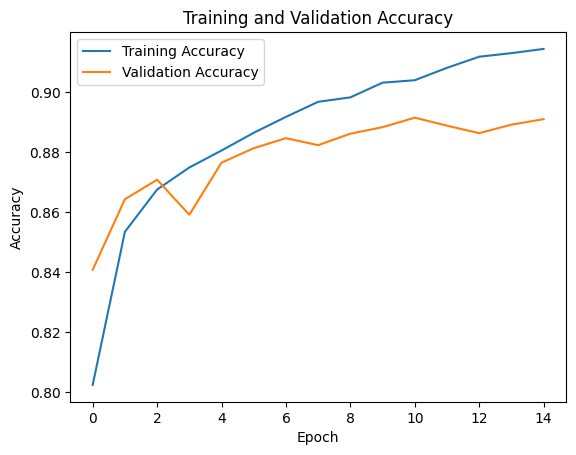

In [23]:
#Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




**e)Evaluate the model on test data and report test accuracy**

In [24]:
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8838


The trained feedforward neural network evaluated the Fashion-MNIST test set and reported a test accuracy of around 88%. This indicates that the network can correctly classify most of the images into their respective categories.

**(f) Discuss the overall approach**

This approach uses a simple feedforward neural network with one hidden layer. It classify images by combining pixel values into weighted steps and does not see images because it ignores the spatial structure. Other architectures like Convolutional Neural Networks (CNNs), will be more suitable for image datas as it can detect shapes and edges.

Increasing the number of parameters can improve accuracy but also increases the risk of overfitting without regularization.The network we used is simple and works well but it doesnot fully take the patterns in space into account.A simple FNN is good for learning the basics but more advanced models can do better in image classification.